In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

In [2]:
def plot_results(history):
    plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Precisión de validación')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()
    plt.show()

    # Graficar la pérdida
    plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
    plt.plot(history.history['val_loss'], label='Pérdida de validación')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.show()

In [3]:
data = load_wine()
X = data.data
y = data.target

In [4]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [5]:
list(data.target_names)

['class_0', 'class_1', 'class_2']

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [7]:
# Convertir las etiquetas a formato one-hot encoding
y = to_categorical(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Crear el modelo MLP
model = Sequential()
model.add(Dense(10, input_dim=13, activation='relu'))  # Capa de entrada con 10 neuronas y función de activación ReLU
model.add(Dense(10, activation='relu'))  # Capa oculta con 10 neuronas y función de activación ReLU
model.add(Dense(10, activation='relu'))  # Capa oculta con 10 neuronas y función de activación ReLU
model.add(Dense(3, activation='softmax'))

# Resumen del modelo
model.summary()

d:\VSRepos\cositas de ia\.conda\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 393 (1.54 KB)

 Trainable params: 393 (1.54 KB)

 Non-trainable params: 0 (0.00 B)

#### Desafío 1: Cambiar la Tasa de Aprendizaje del Optimizador Adam

El optimizador Adam tiene una tasa de aprendizaje por defecto de 0.001. Intente cambiar esta tasa de aprendizaje a diferentes valores y observe cómo afecta el rendimiento del modelo.

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3726 - loss: 82.5315 - val_accuracy: 0.6667 - val_loss: 9.6401
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3411 - loss: 10.6709 - val_accuracy: 0.1333 - val_loss: 5.4113
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4234 - loss: 2.6044 - val_accuracy: 0.4667 - val_loss: 1.2368
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5218 - loss: 1.2116 - val_accuracy: 0.6667 - val_loss: 1.5399
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5553 - loss: 1.9112 - val_accuracy: 0.6667 - val_loss: 1.1881
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6336 - loss: 0.9831 - val_accuracy: 0.6667 - val_loss: 1.0702
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6430 - loss: 0.9161 - val_accuracy: 0.6000 - val_loss: 0.8912
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6879 - loss: 0.9163 - val_accuracy: 0.6667 - val_los

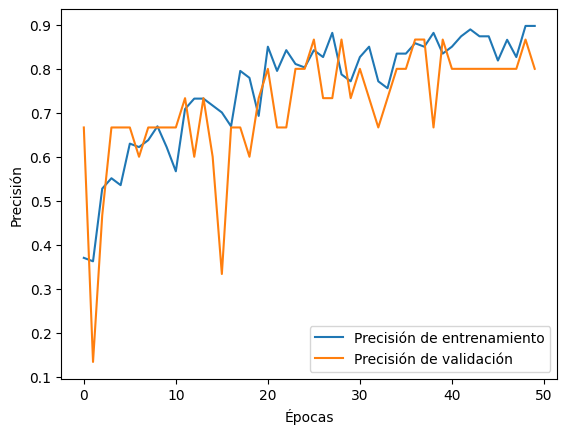

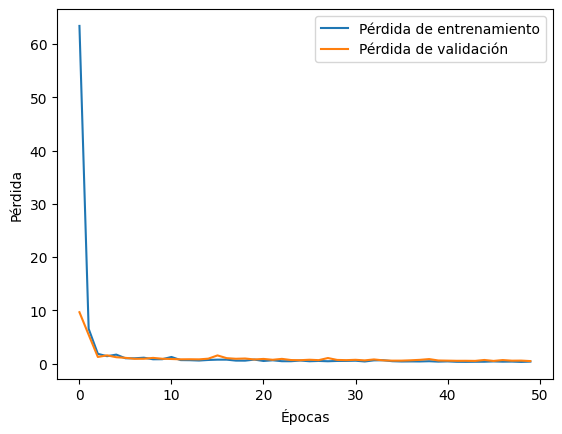

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1)
plot_results(history)

1. Cambie la tasa de aprendizaje a 0.01:

In [10]:
model.compile(optimizer=keras.optimizers.Adam(0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1)

Epoch 1/50


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5011 - loss: 21.4336 - val_accuracy: 0.2667 - val_loss: 4.8585
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6772 - loss: 2.3442 - val_accuracy: 0.7333 - val_loss: 1.9734
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6054 - loss: 2.8755 - val_accuracy: 0.2667 - val_loss: 4.4541
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6551 - loss: 1.4679 - val_accuracy: 0.8000 - val_loss: 0.7723
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7887 - loss: 0.6526 - val_accuracy: 0.8667 - val_loss: 0.7544
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8611 - loss: 0.4139 - val_accuracy: 0.8000 - val_loss: 0.6806
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8438 - loss: 0.4836 - val_accuracy: 0.8667 - val_loss: 0.8897
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6652 - loss: 1.1453 - val_accuracy: 0.8000 - val_loss: 0.5054
Ep

In [41]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8657 - loss: 0.3107  
Precisión en el conjunto de prueba: 86.11%


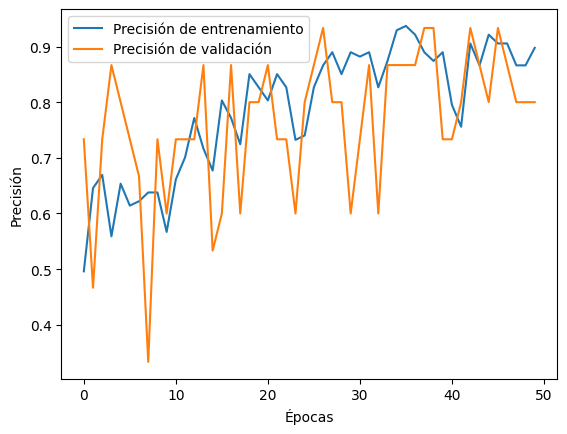

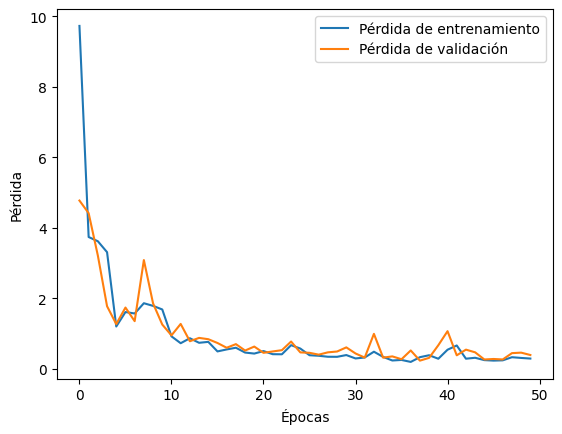

In [42]:
plot_results(history=history)

2. Cambie la tasa de aprendizaje a 0.0001:

In [12]:
model.compile(optimizer=keras.optimizers.Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9210 - loss: 0.2301 - val_accuracy: 0.8000 - val_loss: 0.4411
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8928 - loss: 0.1970 - val_accuracy: 0.8000 - val_loss: 0.4434
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9024 - loss: 0.1948 - val_accuracy: 0.8000 - val_loss: 0.4504
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9213 - loss: 0.1976 - val_accuracy: 0.8000 - val_loss: 0.4505
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9261 - loss: 0.1720 - val_accuracy: 0.8000 - val_loss: 0.4580
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9447 - loss: 0.1614 - val_accuracy: 0.8000 - val_loss: 0.4453
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8700 - loss: 0.2848 - val_accuracy: 0.8000 - val_loss: 0.4594
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9133 - loss: 0.2227 - val_accuracy: 0.8000 - val_loss:

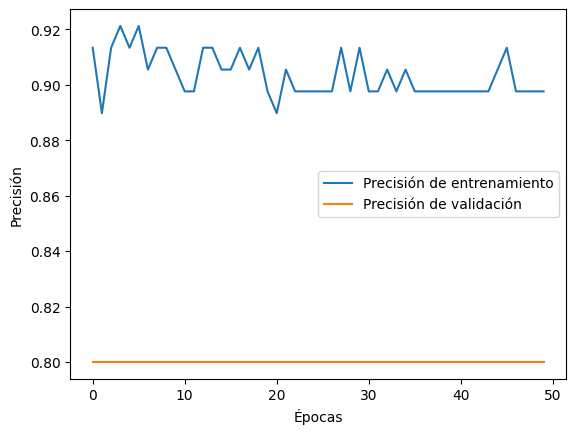

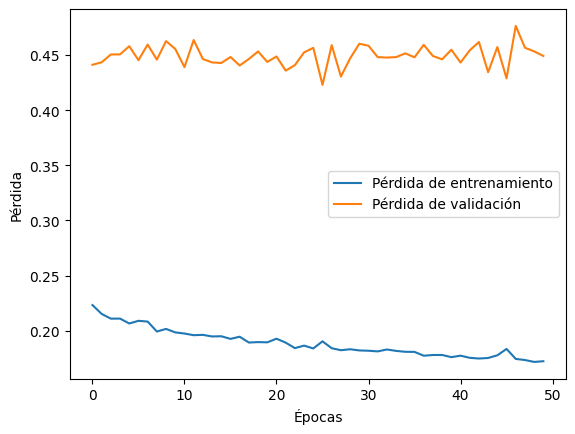

In [13]:
plot_results(history=history)

3. Probar con tasa de aprendizaje = 0.1

In [14]:
model.compile(optimizer=keras.optimizers.Adam(0.1), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5046 - loss: 17.5705 - val_accuracy: 0.1333 - val_loss: 1.3758
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4255 - loss: 1.0986 - val_accuracy: 0.6667 - val_loss: 0.9661
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2925 - loss: 1.1271 - val_accuracy: 0.6667 - val_loss: 1.0516
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2887 - loss: 1.1029 - val_accuracy: 0.6667 - val_loss: 1.0333
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3436 - loss: 1.1081 - val_accuracy: 0.6667 - val_loss: 1.0350
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3667 - loss: 1.1015 - val_accuracy: 0.6667 - val_loss: 1.0447
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2859 - loss: 1.1010 - val_accuracy: 0.6667 - val_loss: 1.0656
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3685 - loss: 1.1030 - val_accuracy: 0.1333 - val_loss

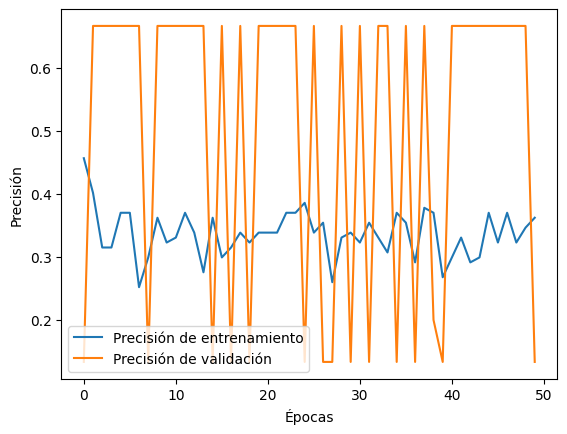

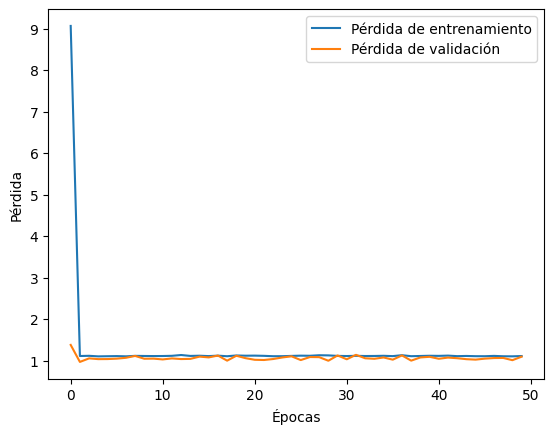

In [15]:
plot_results(history)

*¿Cómo afecta cada cambio en la tasa de aprendizaje a la precisión y la pérdida del modelo durante el entrenamiento y la validación?*

Precisión: Las tasas de aprendizaje que son muy bajas afectan en que es probable que el modelo llegue a un mínimo local, puesto a que se están realizando pasos muy pequeños en la curva de la función de coste. En el caso contrario, si la tasa de aprendizaje es muy alta conlleva a que se realicen pasos por sobre el mínimo global, provocando que la precisión aumente o disminuya considerablemente en cada epoch.

Pérdida: Las tasas de aprendizaje muy bajas afectan en que el valor del error avanza demasiado lento, lo que provocaría que se declaren más epochs, aunque no sería una muy buena opción considerando que la pérdida se puede mantener igual durante todo el entrenamiento. Si consideramos una tasa de aprendizaje alta, como ocurren estos grandes saltos en la curva del error, podría decirse que estos pasos hacen que el error oscile siempre entre dos valores muy cercanos entre sí. 

#### Desafío 2: Modificar el Número de Neuronas en las Capas Ocultas

 Intente cambiar el numero de neuronas del modelo actual y observe cómo afecta el rendimiento del modelo.

1. Cambie el número de neuronas a 256 en cada capa oculta:

In [16]:
# Crear el modelo MLP
model = Sequential()
model.add(Dense(256, input_dim=13, activation='relu'))  
model.add(Dense(256, activation='relu'))  
model.add(Dense(256, activation='relu')) 
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3086 - loss: 33.5857 - val_accuracy: 0.2000 - val_loss: 2.6949
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4662 - loss: 3.1987 - val_accuracy: 0.7333 - val_loss: 5.8188
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4973 - loss: 6.9192 - val_accuracy: 0.6667 - val_loss: 2.4849
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6014 - loss: 2.7195 - val_accuracy: 0.5333 - val_loss: 1.2000
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6442 - loss: 1.1847 - val_accuracy: 0.6667 - val_loss: 2.0165
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6711 - loss: 1.2704 - val_accuracy: 0.5333 - val_loss: 1.2452
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6907 - loss: 0.9692 - val_accuracy: 0.3333 - val_loss: 1.5480
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5817 - loss: 1.3125 - val_accuracy: 0.2667 - val_loss

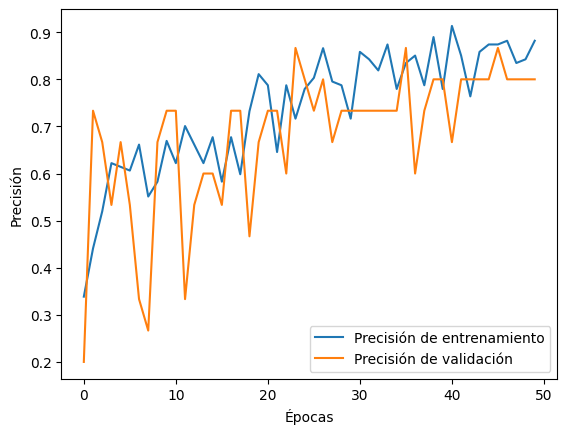

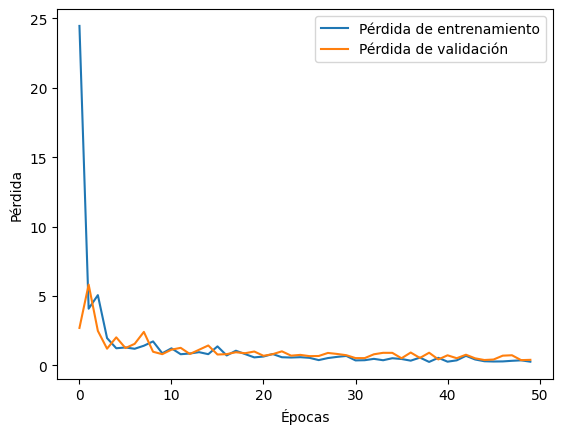

In [17]:
plot_results(history)

2. Cambie el número de neuronas a 1024 en cada capa oculta:

In [18]:
# Crear el modelo MLP
model = Sequential()
model.add(Dense(1024, input_dim=13, activation='relu'))  
model.add(Dense(1024, activation='relu'))  
model.add(Dense(1024, activation='relu'))  
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4361 - loss: 40.7770 - val_accuracy: 0.3333 - val_loss: 4.1916
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5024 - loss: 1.5329 - val_accuracy: 0.3333 - val_loss: 1.2615
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4936 - loss: 1.3852 - val_accuracy: 0.6667 - val_loss: 0.9031
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6455 - loss: 0.7210 - val_accuracy: 0.6667 - val_loss: 0.8761
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6991 - loss: 0.6387 - val_accuracy: 0.3333 - val_loss: 1.1039
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5556 - loss: 0.7296 - val_accuracy: 0.6667 - val_loss: 0.8896
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5967 - loss: 0.8394 - val_accuracy: 0.4667 - val_loss: 1.1142
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5113 - loss: 1.1713 - val_accuracy: 0.6667 - 

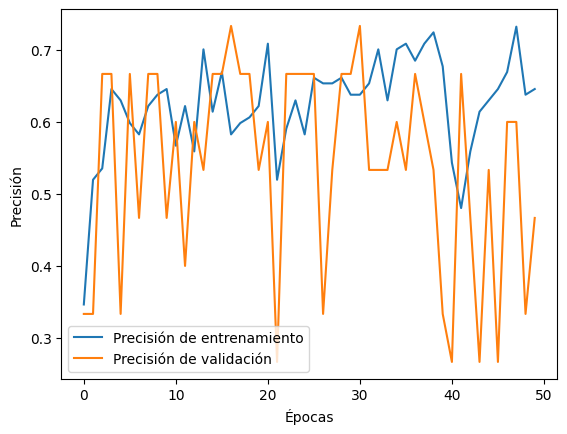

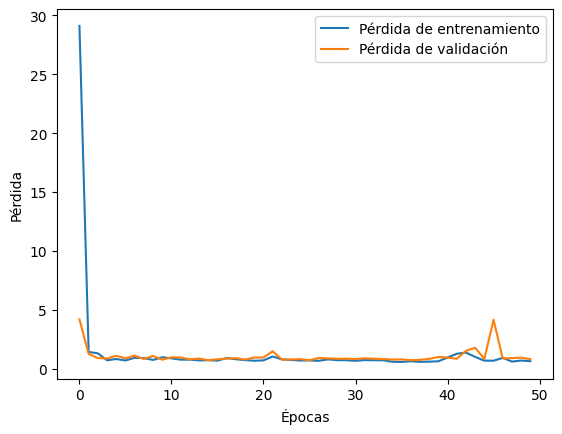

In [19]:
plot_results(history)

*¿Cómo cambia la precisión y la pérdida del modelo con diferentes números de neuronas en las capas ocultas?*

A lo largo del entrenamiento, se puede ver que la precisión es súmamente inestable con altas pérdidas cuando tenemos muchas neuronas por capa. Mientras tanto en el primer caso, se puede apreciar que con un modelo menos complejo, este logra aprender de nuestros datos según lo visto apreciado en el aumento de precisión a lo largo del entrenamiento (aunque con algunas caidas en ciertos epoch) con valores de pérdida menores al caso 2. Por lo tanto, ambas métricas se ven perjudicadas si el modelo es demasiado complejo para nuestro conjunto de datos.

#### Desafío 3: Cambiar la Cantidad de Épocas de Entrenamiento

In [6]:
# Crear el modelo MLP
model = Sequential()
model.add(Dense(10, input_dim=13, activation='relu'))  
model.add(Dense(10, activation='relu'))  
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=500, batch_size=5, validation_split=0.1)

Epoch 1/500


d:\VSRepos\cositas de ia\.conda\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3135 - loss: 59.1085 - val_accuracy: 0.2667 - val_loss: 20.1849
Epoch 2/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3579 - loss: 38.8623 - val_accuracy: 0.6667 - val_loss: 13.3932
Epoch 3/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2532 - loss: 25.1839 - val_accuracy: 0.4000 - val_loss: 8.2384
Epoch 4/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3252 - loss: 14.2438 - val_accuracy: 0.6000 - val_loss: 3.8102
Epoch 5/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3182 - loss: 5.8395 - val_accuracy: 0.2000 - val_loss: 1.8440
Epoch 6/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3417 - loss: 1.6691 - val_accuracy: 0.1333 - val_loss: 1.7667
Epoch 7/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4423 - loss: 1.5156 - val_accuracy: 0.4000 - val_loss: 1.4442
Epoch 8/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3989 - loss: 1.2320 - val_accuracy: 0.1333 - val_los

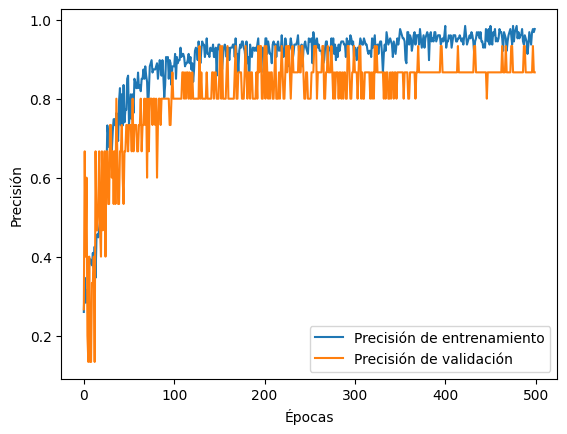

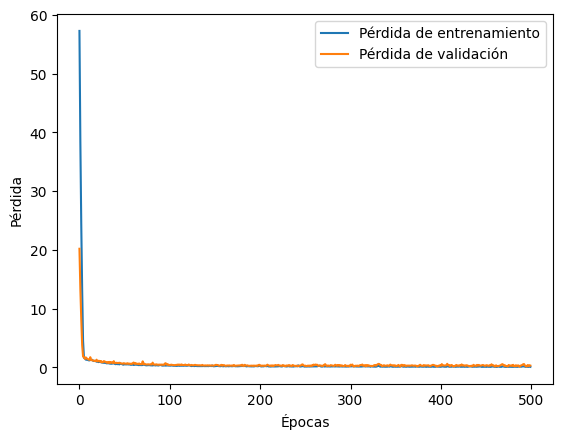

In [7]:
plot_results(history)

1. Cambie el número de épocas a 10:

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9707 - loss: 0.0882 - val_accuracy: 0.8667 - val_loss: 0.3548
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9770 - loss: 0.1002 - val_accuracy: 0.8667 - val_loss: 0.2681
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9497 - loss: 0.1697 - val_accuracy: 0.8667 - val_loss: 0.4557
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9365 - loss: 0.1410 - val_accuracy: 0.8667 - val_loss: 0.2791
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9780 - loss: 0.0529 - val_accuracy: 0.8667 - val_loss: 0.3084
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9929 - loss: 0.0392 - val_accuracy: 0.8667 - val_loss: 0.3457
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9687 - loss: 0.0830 - val_accuracy: 0.8667 - val_loss: 0.3266
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9626 - loss: 0.1259 - val_accuracy: 0.9333 - val_loss:

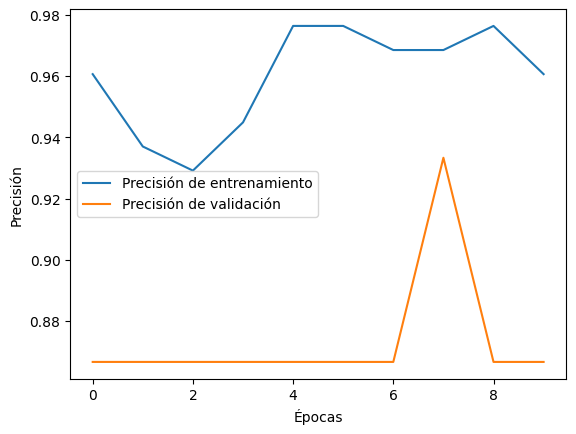

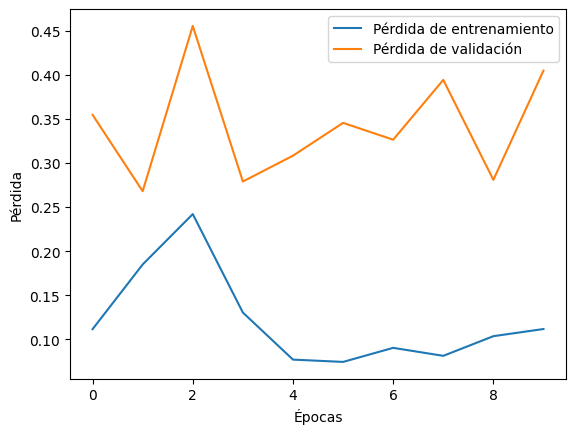

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=5, validation_split=0.1)
plot_results(history)

2. Cambie el número de épocas a 30:

Epoch 1/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9577 - loss: 0.1131 - val_accuracy: 0.8667 - val_loss: 0.2808
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9175 - loss: 0.2161 - val_accuracy: 0.8667 - val_loss: 0.3959
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9661 - loss: 0.0851 - val_accuracy: 0.8667 - val_loss: 0.3306
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9714 - loss: 0.1055 - val_accuracy: 0.8667 - val_loss: 0.3408
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9872 - loss: 0.0531 - val_accuracy: 0.8667 - val_loss: 0.2754
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9510 - loss: 0.0990 - val_accuracy: 0.9333 - val_loss: 0.1320
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9672 - loss: 0.1359 - val_accuracy: 0.8667 - val_loss: 0.6058
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9614 - loss: 0.2100 - val_accuracy: 0.8667 - val_loss:

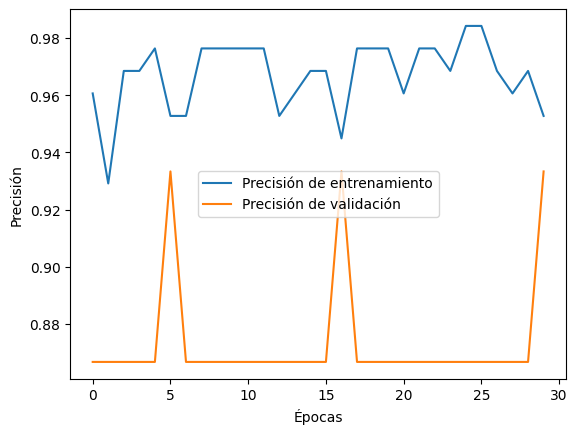

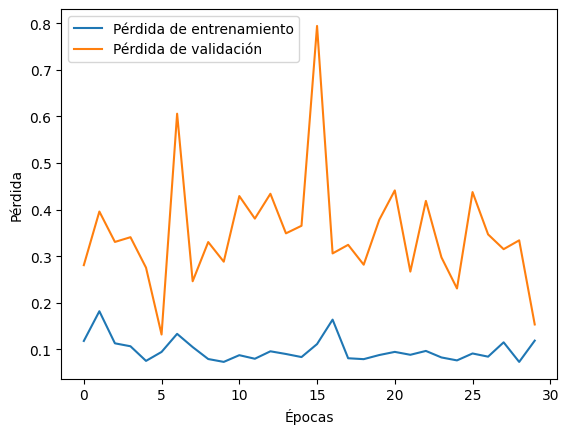

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, batch_size=5, validation_split=0.1)
plot_results(history)

*¿Cómo afecta el número de épocas a la precisión y la pérdida del modelo durante el entrenamiento y la validación? ¿Observa algún signo de sobreajuste o subajuste?*

Se observa que la cantidad de epochs afecta a la precisión y la pérdida cuando estas son en grandes cantidades, puesto a que en cierto punto el modelo deja de mejorar e inclusive se empiezan a notar grandes diferencias entre la precisión de validación y la de entrenamiento. Se ve un caso de overfitting cuando se hacen 500 epochs debido a que la precisión de entrenamiento es mayor a la de validación. Sin embargo, se ve que al entrenar el modelo por 30 epochs resulta ser mejor para el modelo porque la precisión y pérdida están en valores cercanos a los ideales sin haber mucha diferencia entre validación y entrenamiento, por lo que el rendimiento es más aceptable en caso de ser utilizado con nuevos ejemplos. 

#### Desafío 4: Modificar la Función de Activación en las Capas Ocultas

1. Cambie la función de activación a `sigmoid`:

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3822 - loss: 1.5825 - val_accuracy: 0.6667 - val_loss: 0.9089
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4076 - loss: 1.3889 - val_accuracy: 0.6667 - val_loss: 0.9064
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4102 - loss: 1.2718 - val_accuracy: 0.6667 - val_loss: 0.9056
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4171 - loss: 1.2296 - val_accuracy: 0.6667 - val_loss: 0.9139
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4029 - loss: 1.1985 - val_accuracy: 0.6667 - val_loss: 0.9262
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3954 - loss: 1.1584 - val_accuracy: 0.6667 - val_loss: 0.9382
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3382 - loss: 1.1430 - val_accuracy: 0.6667 - val_loss: 0.9666
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2772 - loss: 1.1492 - val_accuracy: 0.6667 - val_loss:

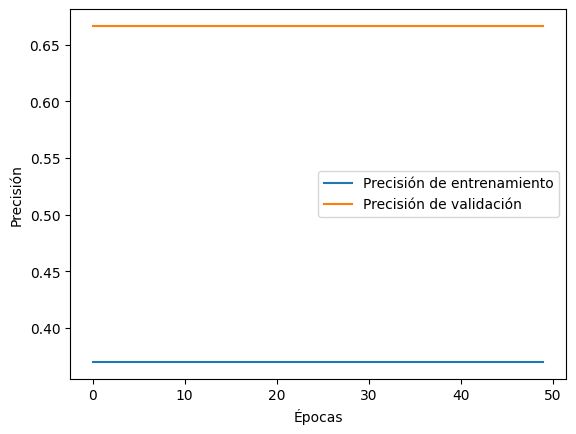

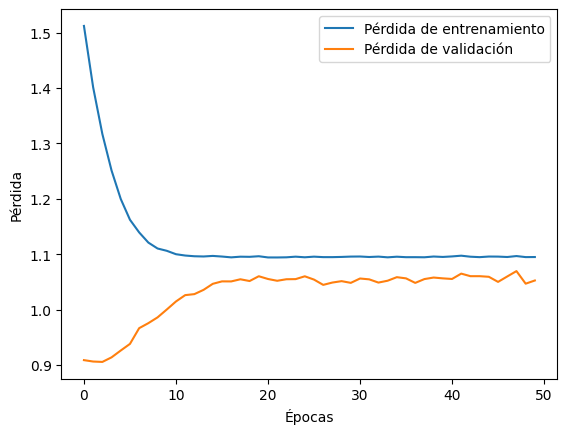

In [15]:
# Crear el modelo MLP
model = Sequential()
model.add(Dense(10, input_dim=13, activation='sigmoid'))  
model.add(Dense(10, activation='sigmoid'))  
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1)
plot_results(history)

2. Cambie la función de activación a `tanh`:

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2777 - loss: 1.4245 - val_accuracy: 0.2000 - val_loss: 1.6082
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2338 - loss: 1.2860 - val_accuracy: 0.2000 - val_loss: 1.3599
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2857 - loss: 1.1625 - val_accuracy: 0.1333 - val_loss: 1.2245
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4023 - loss: 1.1095 - val_accuracy: 0.1333 - val_loss: 1.1257
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3539 - loss: 1.0936 - val_accuracy: 0.6667 - val_loss: 1.0826
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4128 - loss: 1.0949 - val_accuracy: 0.6667 - val_loss: 1.0564
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3506 - loss: 1.0942 - val_accuracy: 0.6667 - val_loss: 1.0597
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4396 - loss: 1.0952 - val_accuracy: 0.6667 - val_loss:

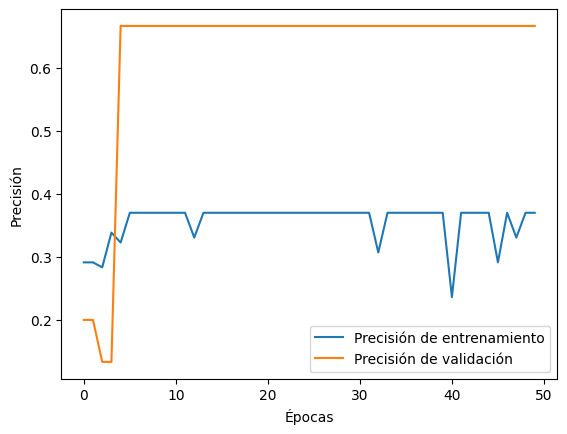

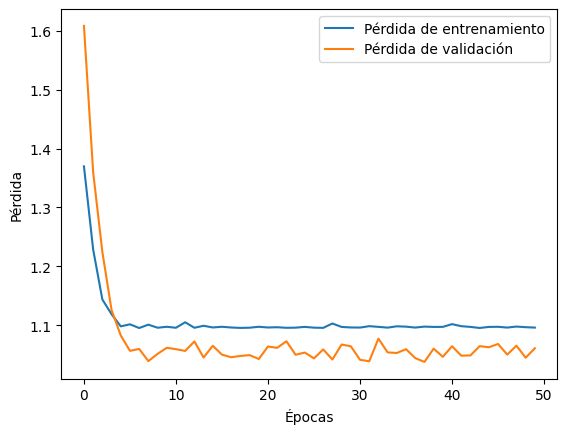

In [16]:
# Crear el modelo MLP
model = Sequential()
model.add(Dense(10, input_dim=13, activation='tanh')) 
model.add(Dense(10, activation='tanh')) 
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1)
plot_results(history)

*¿Cómo afectan las diferentes funciones de activación en las capas ocultas a la precisión y la pérdida del modelo durante el entrenamiento y la validación?*

Usar estas distintas funciones de activación afecta en que los modelos terminen siendo súmamente pobres durante y después del entrenamiento: Se produjeron mínimos locales en ambos casos con un error elevado y la precisión se mantuvo deficiente, sin mayores cambios durante cada epoch.  